In [1]:
from scipy.optimize import minimize 
import sklearn as sl

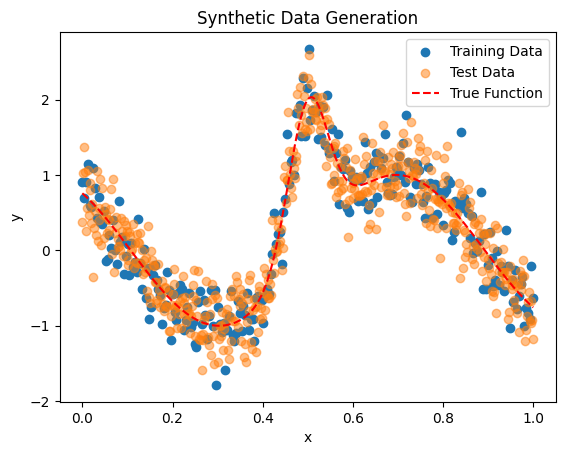

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n = 250
ntest = 500

# Define the function f(x)
def f(x):
    return np.sin(2 * (4 * x - 2)) + 2 * np.exp(-16**2 * (x - 0.5)**2)

# Generate training data
x_train = np.linspace(0, 1, n)
eps_train = np.random.normal(0, 0.3, n)
y_train = f(x_train) + eps_train

# Generate test data
x_test = np.linspace(0, 1, ntest)
eps_test = np.random.normal(0, 0.3, ntest)
y_test = f(x_test) + eps_test

# Plot the data
plt.scatter(x_train, y_train, label='Training Data')
plt.scatter(x_test, y_test, label='Test Data', alpha=0.5)
plt.plot(x_test, f(x_test), color='red', linestyle='--', label='True Function')
plt.title('Synthetic Data Generation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [28]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Access the features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

In [34]:
from sklearn.linear_model import LinearRegression

In [38]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [39]:
X.shape 

(442, 10)

In [40]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Randomly initialize weights
initial_w = np.random.rand(X.shape[1])
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, initial_w).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[ -10.07276178 -239.89001788  519.67707894  324.13324633 -792.39621232
  476.84572982  100.87180575  177.12176569  751.28221807   67.84094585]
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


In [43]:
# Machine learning context with gradient descent

import numpy as np

# Assuming X and y are your feature matrix and target variable
# X should have shape (442, 10), and y should have shape (442,)

# Set random seed for reproducibility
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Randomly initialize weights
w = np.random.rand(X.shape[1])

# The squared error, summed over training examples
def my_loss(w, X, y):
    y_pred = X @ w
    error = y - y_pred
    return np.sum(error**2)

# Gradient descent
for i in range(num_iterations):
    # Calculate the gradient of the loss with respect to weights
    gradient = -2 * X.T @ (y - X @ w)
    
    # Update weights using the gradient and learning rate
    w = w - learning_rate * gradient

    # Print the loss every 100 iterations
    if i % 100 == 0:
        loss = my_loss(w, X, y)
        print(f"Iteration {i}, Loss: {loss}")

print("Optimal weights:", w)


Iteration 0, Loss: 12698448.879107816
Iteration 100, Loss: 11514859.56868573
Iteration 200, Loss: 11503853.480413586
Iteration 300, Loss: 11502997.427172551
Iteration 400, Loss: 11502618.654083528
Iteration 500, Loss: 11502297.982639953
Iteration 600, Loss: 11501998.33073812
Iteration 700, Loss: 11501713.679300006
Iteration 800, Loss: 11501441.875444684
Iteration 900, Loss: 11501181.56312377
Optimal weights: [  -6.94528673 -236.53425679  527.88634015  321.83967595 -149.91285255
  -38.20802714 -179.94258308  105.50441543  509.17377346   69.78804187]


In [44]:
# Traditional Statistics context with beta hat calculation

def beta_hat_closed_form(X, y):
    # Add a column of ones to X for the intercept term
    X_extended = np.c_[np.ones(X.shape[0]), X]
    
    # Calculate beta hat using the closed-form solution
    beta_hat = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
    
    return beta_hat

# Example usage:
# Assuming X is your feature matrix with shape (m, n) and y is your target variable with shape (m,)
# where m is the number of samples and n is the number of features.

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 3)  # Example with 3 features
y = 2 * X[:, 0] + 3 * X[:, 1] - 5 * X[:, 2] + np.random.normal(0, 0.1, 100)  # Example linear relationship

# Calculate beta hat using the closed-form solution
beta_hat = beta_hat_closed_form(X, y)

# Print the calculated coefficients
print("Beta Hat Coefficients:")
print(beta_hat)


Beta Hat Coefficients:
[-0.02649854  2.02780041  2.98422378 -4.94295942]


In [47]:
LinearRegression(fit_intercept=True).fit(X, y).coef_

array([ 2.02780041,  2.98422378, -4.94295942])

In [48]:
X_extended = np.c_[np.ones(X.shape[0]), X]

In [49]:
X_extended

array([[1.        , 0.37454012, 0.95071431, 0.73199394],
       [1.        , 0.59865848, 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615, 0.60111501],
       [1.        , 0.70807258, 0.02058449, 0.96990985],
       [1.        , 0.83244264, 0.21233911, 0.18182497],
       [1.        , 0.18340451, 0.30424224, 0.52475643],
       [1.        , 0.43194502, 0.29122914, 0.61185289],
       [1.        , 0.13949386, 0.29214465, 0.36636184],
       [1.        , 0.45606998, 0.78517596, 0.19967378],
       [1.        , 0.51423444, 0.59241457, 0.04645041],
       [1.        , 0.60754485, 0.17052412, 0.06505159],
       [1.        , 0.94888554, 0.96563203, 0.80839735],
       [1.        , 0.30461377, 0.09767211, 0.68423303],
       [1.        , 0.44015249, 0.12203823, 0.49517691],
       [1.        , 0.03438852, 0.9093204 , 0.25877998],
       [1.        , 0.66252228, 0.31171108, 0.52006802],
       [1.        , 0.54671028, 0.18485446, 0.96958463],
       [1.        , 0.77513282,

In [50]:
X

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159],
       [0.94888554, 0.96563203, 0.80839735],
       [0.30461377, 0.09767211, 0.68423303],
       [0.44015249, 0.12203823, 0.49517691],
       [0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802],
       [0.54671028, 0.18485446, 0.96958463],
       [0.77513282, 0.93949894, 0.89482735],
       [0.59789998, 0.92187424, 0.0884925 ],
       [0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751],
       [0.35675333, 0.28093451, 0.54269608],
       [0.

In [52]:
np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y

array([-0.02649854,  2.02780041,  2.98422378, -4.94295942])

In [66]:
X[:,1]

array([0.95071431, 0.59865848, 0.15599452, 0.86617615, 0.70807258,
       0.96990985, 0.21233911, 0.18340451, 0.52475643, 0.29122914,
       0.13949386, 0.36636184, 0.78517596, 0.51423444, 0.04645041,
       0.17052412, 0.94888554, 0.80839735, 0.09767211, 0.44015249,
       0.49517691, 0.9093204 , 0.66252228, 0.52006802, 0.18485446,
       0.77513282, 0.89482735, 0.92187424, 0.19598286, 0.32533033,
       0.27134903, 0.35675333, 0.54269608, 0.80219698, 0.98688694,
       0.19871568, 0.81546143, 0.72900717, 0.07404465, 0.11586906,
       0.62329813, 0.06355835, 0.32518332, 0.63755747, 0.47221493,
       0.71324479, 0.5612772 , 0.4937956 , 0.42754102, 0.10789143,
       0.63641041, 0.50857069, 0.24929223, 0.75555114, 0.07697991,
       0.16122129, 0.80812038, 0.87146059, 0.18657006, 0.53934224,
       0.8960913 , 0.11005192, 0.42710779, 0.86073058, 0.5107473 ,
       0.22210781, 0.33761517, 0.32320293, 0.70301896, 0.97178208,
       0.2517823 , 0.30087831, 0.03688695, 0.50267902, 0.27864

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent function
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    # Randomly initialize weights
    w = np.random.rand(X.shape[0])
    
    # Store weights and losses for plotting
    all_weights = [w.copy()]
    all_losses = []

    # Gradient descent iterations
    for i in range(num_iterations):
        # Calculate predicted values
        y_pred = X @ w
        
        # Calculate the gradient of the loss with respect to weights
        gradient = -2 * X.T @ (y - y_pred)
        
        # Update weights using the gradient and learning rate
        w = w - learning_rate * gradient
        
        # Calculate the mean squared error for visualization
        loss = np.mean((y - y_pred)**2)
        all_losses.append(loss)
        
        # Store weights for visualization
        all_weights.append(w.copy())

    return all_weights, all_losses

# Example usage:
# Assuming X is your feature matrix with shape (m, 2) and y is your target variable with shape (m,)
# where m is the number of samples and 2 represents two features.

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X[:, 0] + 3 + np.random.normal(0, 0.1, 100)

# Add a column of ones to X for the intercept term
X_extended = np.c_[np.ones(X.shape[0]), X]

# Run gradient descent
all_weights, all_losses = gradient_descent(X_extended, y)

# Visualize the data points and regression lines
plt.scatter(X[:, 0], y, label='Actual Data Points')

for i, weights in enumerate(all_weights):
    if i % 100 == 0:
        y_pred_line = X_extended @ weights
        plt.plot(X[:, 0], y_pred_line, label=f'Iteration {i}')

plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
plt.title('Gradient Descent Visualization')
plt.legend()
plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 2)

[1.10233017 0.83038827 0.66453153]
[1.38093499 1.13591586 1.13039128]
[1.25543096 1.22144686 1.35251212]
[1.12473387 1.29180456 1.53995287]
[1.00653561 1.35683244 1.70549211]
[0.90039591 1.41710093 1.8521528 ]
[0.80513304 1.4727888  1.98218913]
[0.71964515 1.52409288 2.09755694]
[0.64293853 1.57123518 2.19997042]
[0.57411888 1.61445341 2.2909343 ]


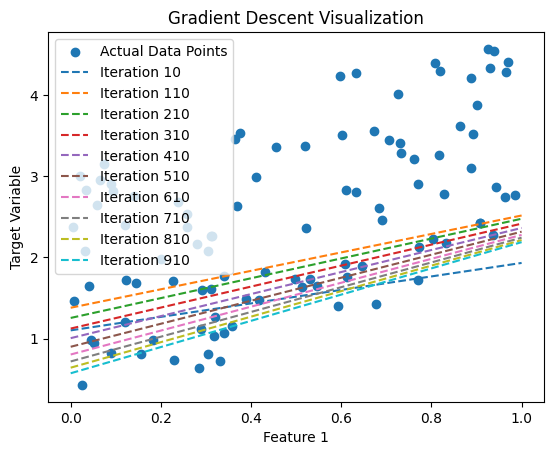

Range of y_pred_line: 0.8623290427674463 4.140886815442702
Range of y: 0.43059098710492716 4.567980816117081


In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Gradient descent function
def gradient_descent(X, y, learning_rate=0.0001, num_iterations=1000):
    # Randomly initialize weights
    w = np.random.rand(X.shape[1])
    
    # Store weights and losses for plotting
    all_weights = [w.copy()]
    all_losses = []

    # Gradient descent iterations
    for i in range(num_iterations):
        # Calculate predicted values
        y_pred = X @ w
        
        # Calculate the gradient of the loss with respect to weights
        gradient = -2 * X.T @ (y - y_pred)
        
        # Update weights using the gradient and learning rate
        w = w - learning_rate * gradient
        
        # Calculate the mean squared error for visualization
        loss = np.mean((y - y_pred)**2)
        all_losses.append(loss)
        
        # Store weights for visualization
        all_weights.append(w.copy())

    return all_weights, all_losses

# Example usage:
# Assuming X is your feature matrix with shape (m, 2) and y is your target variable with shape (m,)
# where m is the number of samples and 2 represents two features.

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.1, 100)

# Add a column of ones to X for the intercept term
X_extended = np.c_[np.ones(X.shape[0]), X]

# Run gradient descent
all_weights, all_losses = gradient_descent(X_extended, y)


# Create a figure and axes
fig, axs = plt.subplots()

# Visualize the data points and regression lines
axs.scatter(X[:, 0], y, label='Actual Data Points')

for i, weights in enumerate(all_weights):
    if i % 100 == 10:
        y_pred_line = X_extended @ weights
        print(weights)
        #axs.scatter(X[:, 0], y_pred_line, label=f'Iteration {i}')
        random_X = np.linspace(0., 1., 100)
        random_Y = weights[0] + (random_X * weights[1])
        axs.plot(random_X, random_Y, label=f'Iteration {i}', linestyle='--')

axs.set_xlabel('Feature 1')
axs.set_ylabel('Target Variable')
axs.set_title('Gradient Descent Visualization')
axs.legend()
plt.show()

# Print additional information
print("Range of y_pred_line:", np.min(y_pred_line), np.max(y_pred_line))
print("Range of y:", np.min(y), np.max(y))


[1.34238554 0.78434859]
[1.82524235 1.03328074]
[2.25100761 1.25329241]
[2.62640878 1.4477879 ]
[2.95738077 1.61977044]
[3.24915924 1.77188948]
[3.50636305 1.90648234]
[3.73306688 2.02561103]
[3.93286538 2.13109461]
[4.10892968 2.22453788]
[4.2640573 2.3073566]
[4.4007162  2.38079975]
[4.52108356 2.44596917]
[4.62708005 2.50383693]
[4.72040006 2.5552606 ]
[4.80253835 2.60099672]
[4.87481358 2.64171274]
[4.93838904 2.67799748]
[4.99429097 2.71037041]
[5.04342468 2.73928982]
[5.08658884 2.76516005]
[5.12448801 2.78833778]
[5.15774371 2.80913771]
[5.18690428 2.82783749]
[5.2124534  2.84468207]
[5.2348178  2.85988755]
[5.25437389 2.87364461]
[5.27145376 2.88612145]
[5.28635035 2.8974665 ]
[5.29932207 2.90781072]
[5.3105969  2.91726964]
[5.32037594 2.9259452 ]
[5.32883659 2.93392736]
[5.33613536 2.94129549]
[5.34241027 2.94811963]
[5.34778313 2.95446157]
[5.35236134 2.96037586]
[5.35623966 2.96591061]
[5.35950169 2.97110832]
[5.36222115 2.97600645]
[5.36446308 2.9806381 ]
[5.36628485 2.9850

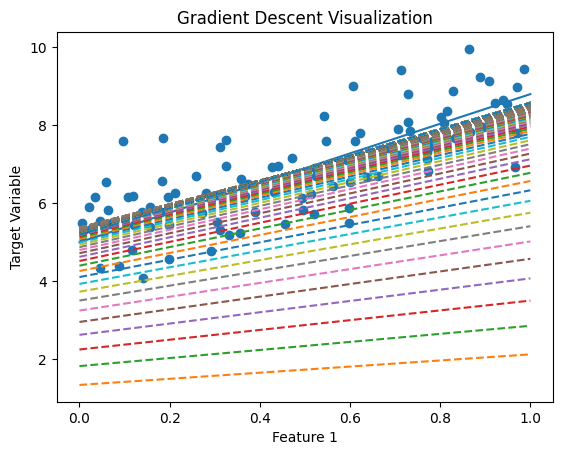

Range of y_pred_line: 5.216025837033055 8.531793160836973
Range of y: 4.088777143798993 9.958990078357537


In [43]:
import numpy as np
import matplotlib.pyplot as plt


# Gradient descent function
def gradient_descent(X, y, learning_rate=0.0001, num_iterations=3000):
    # Randomly initialize weights
    w = np.random.rand(2)
    
    # Store weights and losses for plotting
    all_weights = [w.copy()]
    all_losses = []

    # Gradient descent iterations
    for i in range(num_iterations):
        # Calculate predicted values
        y_pred = X @ w
        
        # Calculate the gradient of the loss with respect to weights
        gradient = -2 * X.T @ (y - y_pred)
        
        # Update weights using the gradient and learning rate
        w = w - learning_rate * gradient
        
        # Calculate the mean squared error for visualization
        loss = np.mean((y - y_pred)**2)
        all_losses.append(loss)
        
        # Store weights for visualization
        all_weights.append(w.copy())

    return all_weights, all_losses

# Example usage:
# Assuming X is your feature matrix with shape (m, 2) and y is your target variable with shape (m,)
# where m is the number of samples and 2 represents two features.

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1)
y =  (0.8 * X[:, 0] * 3) + (1.4 * X[:, 0]) + 5 + np.random.normal(0, 0.9, 100)

# Add a column of ones to X for the intercept term
X_extended = np.c_[np.ones(X.shape[0]), X]

# Run gradient descent
all_weights, all_losses = gradient_descent(X_extended, y)


# Create a figure and axes
fig, axs = plt.subplots()

random_X = np.linspace(0., 1., 100)
true_Y = (0.8 * random_X * 3) + (1.4 * random_X) + 5

# Visualize the data points and regression lines
axs.scatter(X[:, 0], y, label='Actual Data Points')
axs.plot(random_X, true_Y, label=f'True Line', linestyle='-')


for i, weights in enumerate(all_weights):
    if (i % 5 == 0) & (i != 0):
        y_pred_line = X_extended @ weights
        print(weights)
        #axs.scatter(X[:, 0], y_pred_line, label=f'Iteration {i}')
        random_Y = weights[0] + (random_X * weights[1])
        axs.plot(random_X, random_Y, label=f'Iteration {i}', linestyle='--')

axs.set_xlabel('Feature 1')
axs.set_ylabel('Target Variable')
axs.set_title('Gradient Descent Visualization')
#axs.legend(False)
plt.show()

# Print additional information
print("Range of y_pred_line:", np.min(y_pred_line), np.max(y_pred_line))
print("Range of y:", np.min(y), np.max(y))


In [91]:
y

array([3.53322068, 3.28318871, 0.80932809, 2.64326052, 3.51302521,
       2.99828184, 2.18277226, 0.97951882, 2.08528561, 1.81628592,
       1.75804693, 1.6013066 , 3.36400547, 1.98332897, 1.40638639,
       1.91634137, 2.95222099, 4.28108249, 0.81329244, 2.60734251,
       1.72189703, 2.83085345, 2.5327959 , 2.26634454, 1.64928411,
       4.40992113, 4.53701425, 4.23343958, 0.82750033, 0.98072981,
       1.48431242, 2.77598224, 2.16761099, 2.75983944, 3.15708586,
       2.13335369, 2.37274915, 3.44925147, 1.72002315, 1.15017852,
       3.61751061, 0.72789722, 1.6148327 , 3.41041651, 3.10268452,
       2.39429536, 3.21122256, 2.90902412, 2.36386745, 0.43059099,
       2.08039473, 2.25980424, 2.4252427 , 2.99363676, 0.74003959,
       1.11454536, 4.33526121, 4.26646243, 2.22414338, 3.51670129,
       4.39855439, 1.03130185, 1.70566677, 4.2941182 , 1.46886365,
       1.47746358, 1.20403989, 2.86361562, 3.37810398, 3.45587893,
       2.7488675 , 1.73586035, 0.63314864, 2.8360608 , 0.94532

# Loss Functions

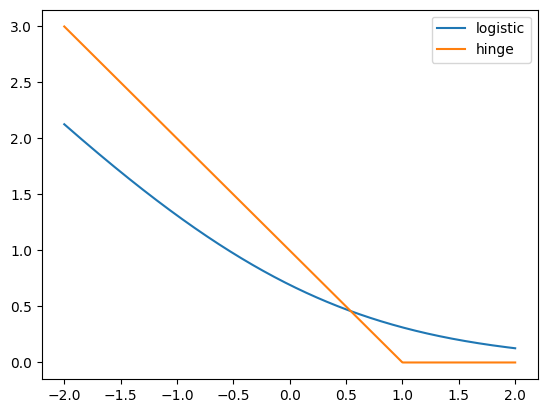

In [44]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[267.508765]


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.